# Partie 1/3 : Représentations vectorielles + TP

François HU - Data scientist au DataLab de la Société Générale Assurances - *19/11/19* - https://nbviewer.jupyter.org/github/curiousML/DSA/tree/master/text_mining/

In [38]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

**Quelques motivations :**

- contextes **non-supervisé**

- représenter numériquement des **mots** de sorte que la relation suivante ait un sens :

``vect(king) - vect(man) + vect(woman) = vect(queen)``

- représenter numériquement **des thèmes (topics) cachés** et **les documents** :

    - créer des **systèmes de recommandation** (utilisés par les e-commerçants, les moteurs de recherche, la publicité digitale, ...)
    - **catégorisation** de textes
    - processus d'**exploration des données**
    - en bio-informatique : **extraire des connaissances cachées** des données biologiques
    - ...

## 1. Word Embeddings
<font color = "grey">*cacher le code</font>

In [2]:
from IPython.display import HTML, Image
HTML('''<script>code_show=true; function code_toggle() {if (code_show){$('div.input').hide();} else {$('div.input').show();}code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="cacher / afficher code"></form>''')

### Représentation vectorielle des mots : one-hot encoding ?

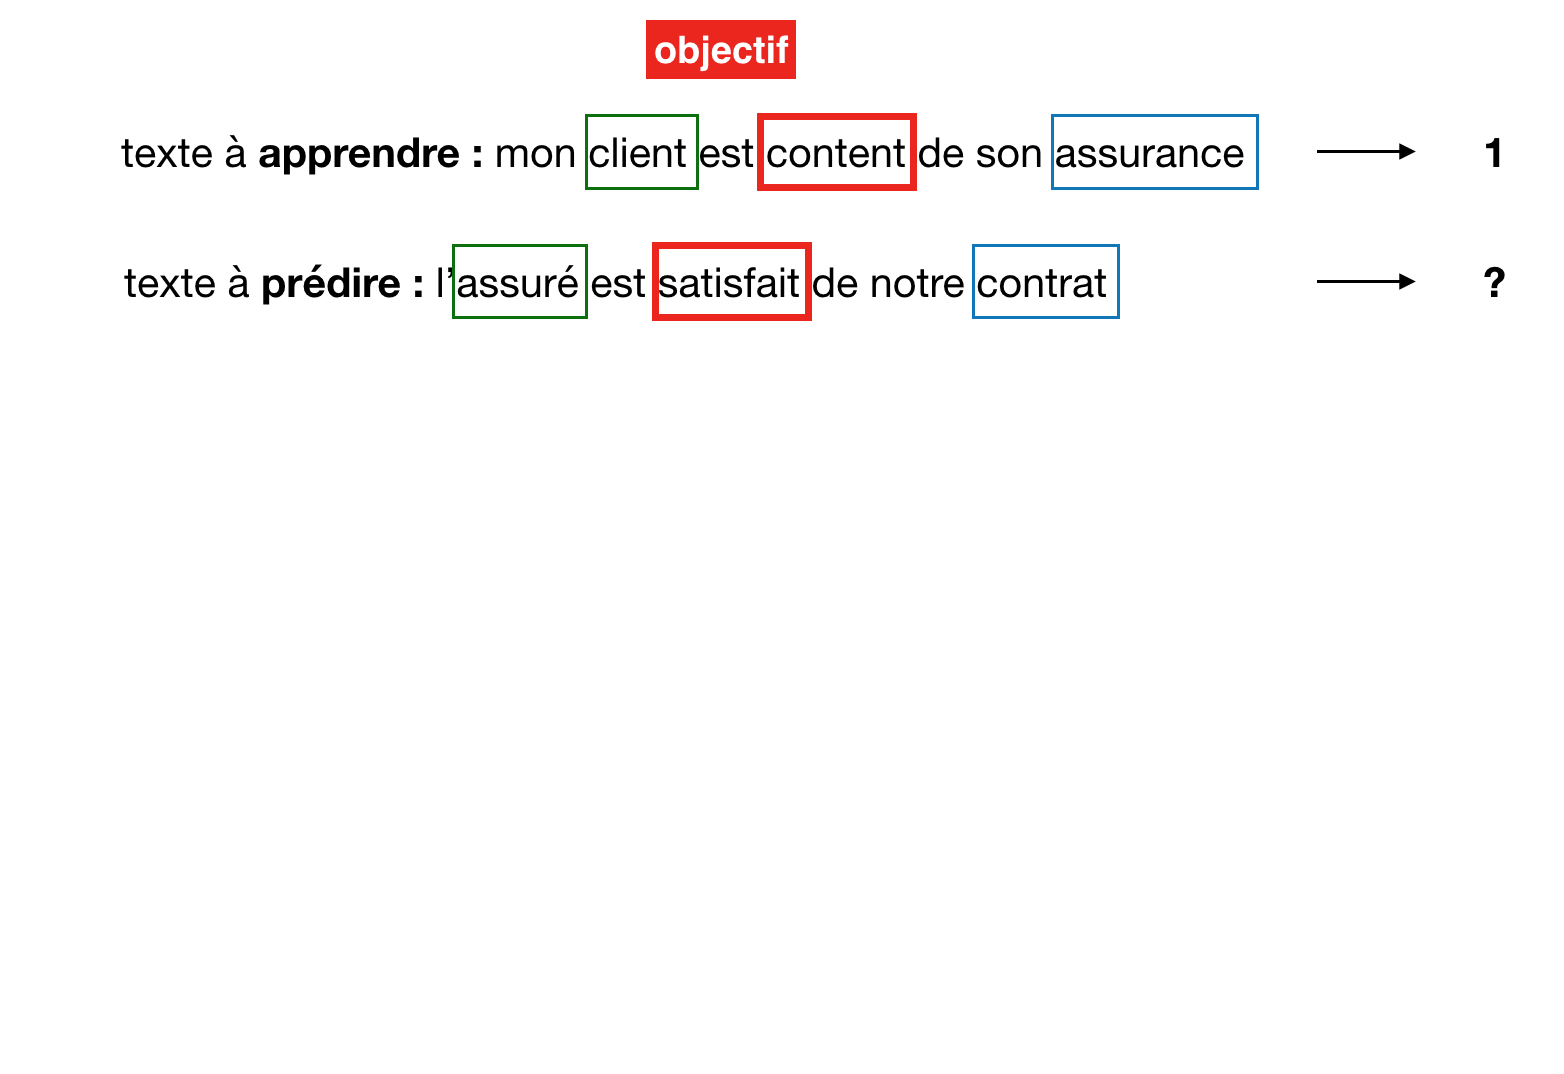

In [26]:
Image("img/vectBOW1.png", width=700, height = 200)

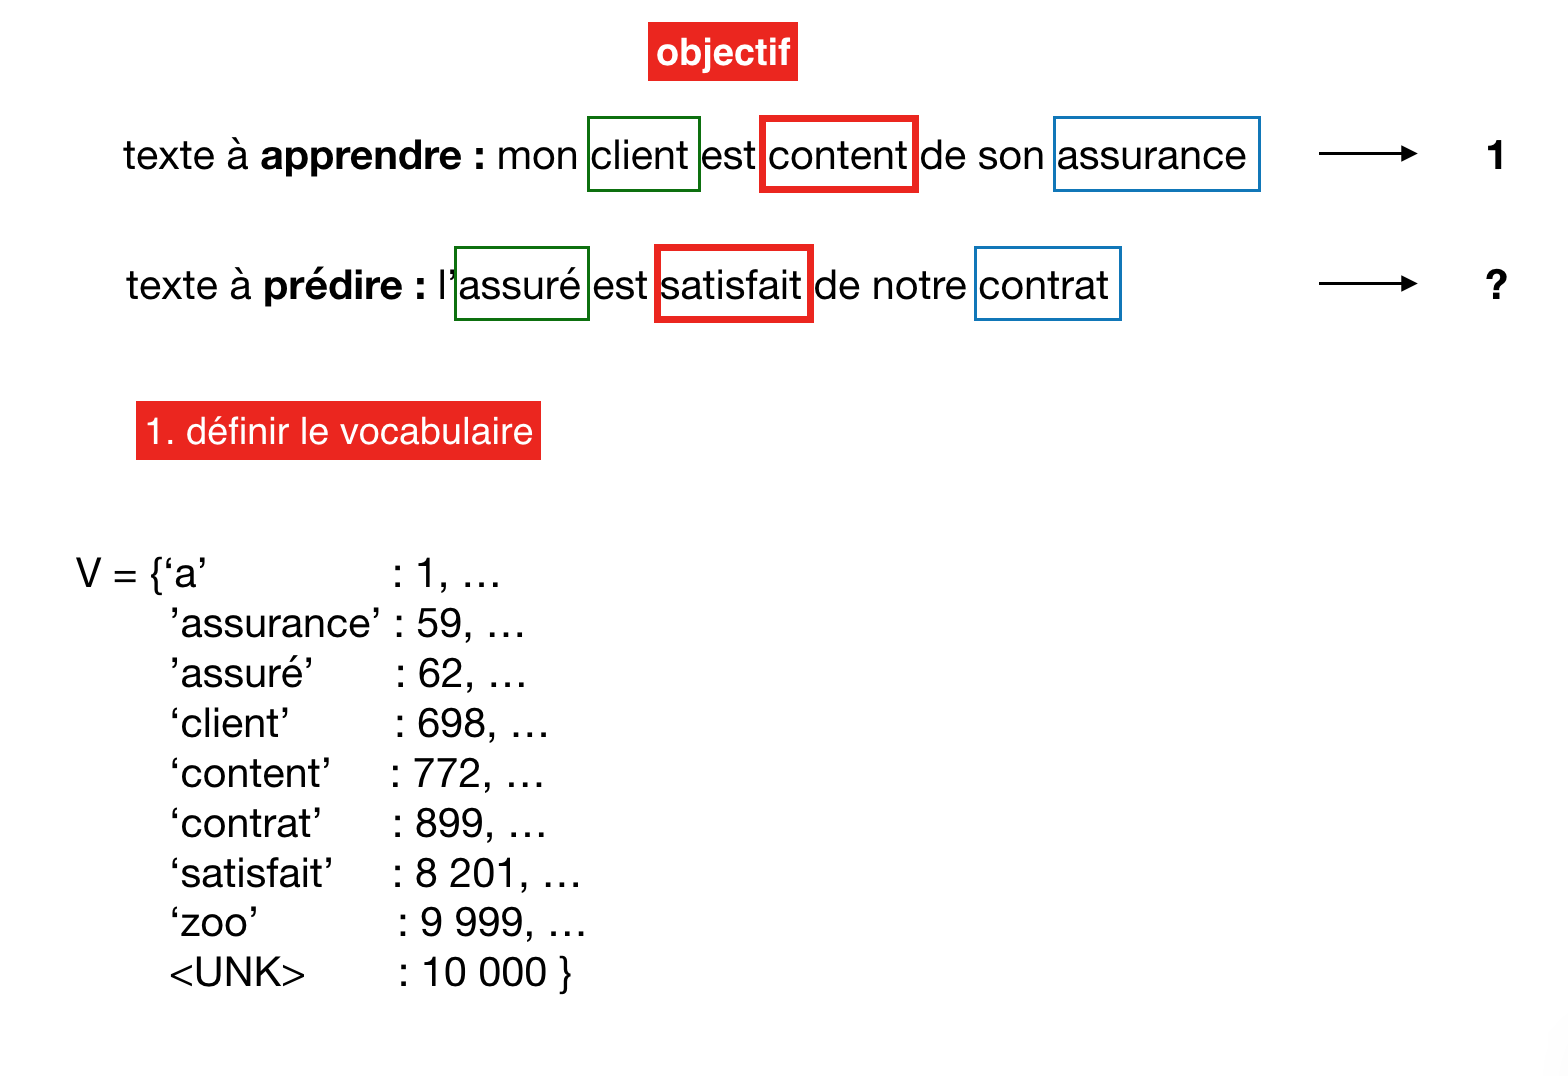

In [27]:
Image("img/vectBOW2.png", width=750, height = 200)

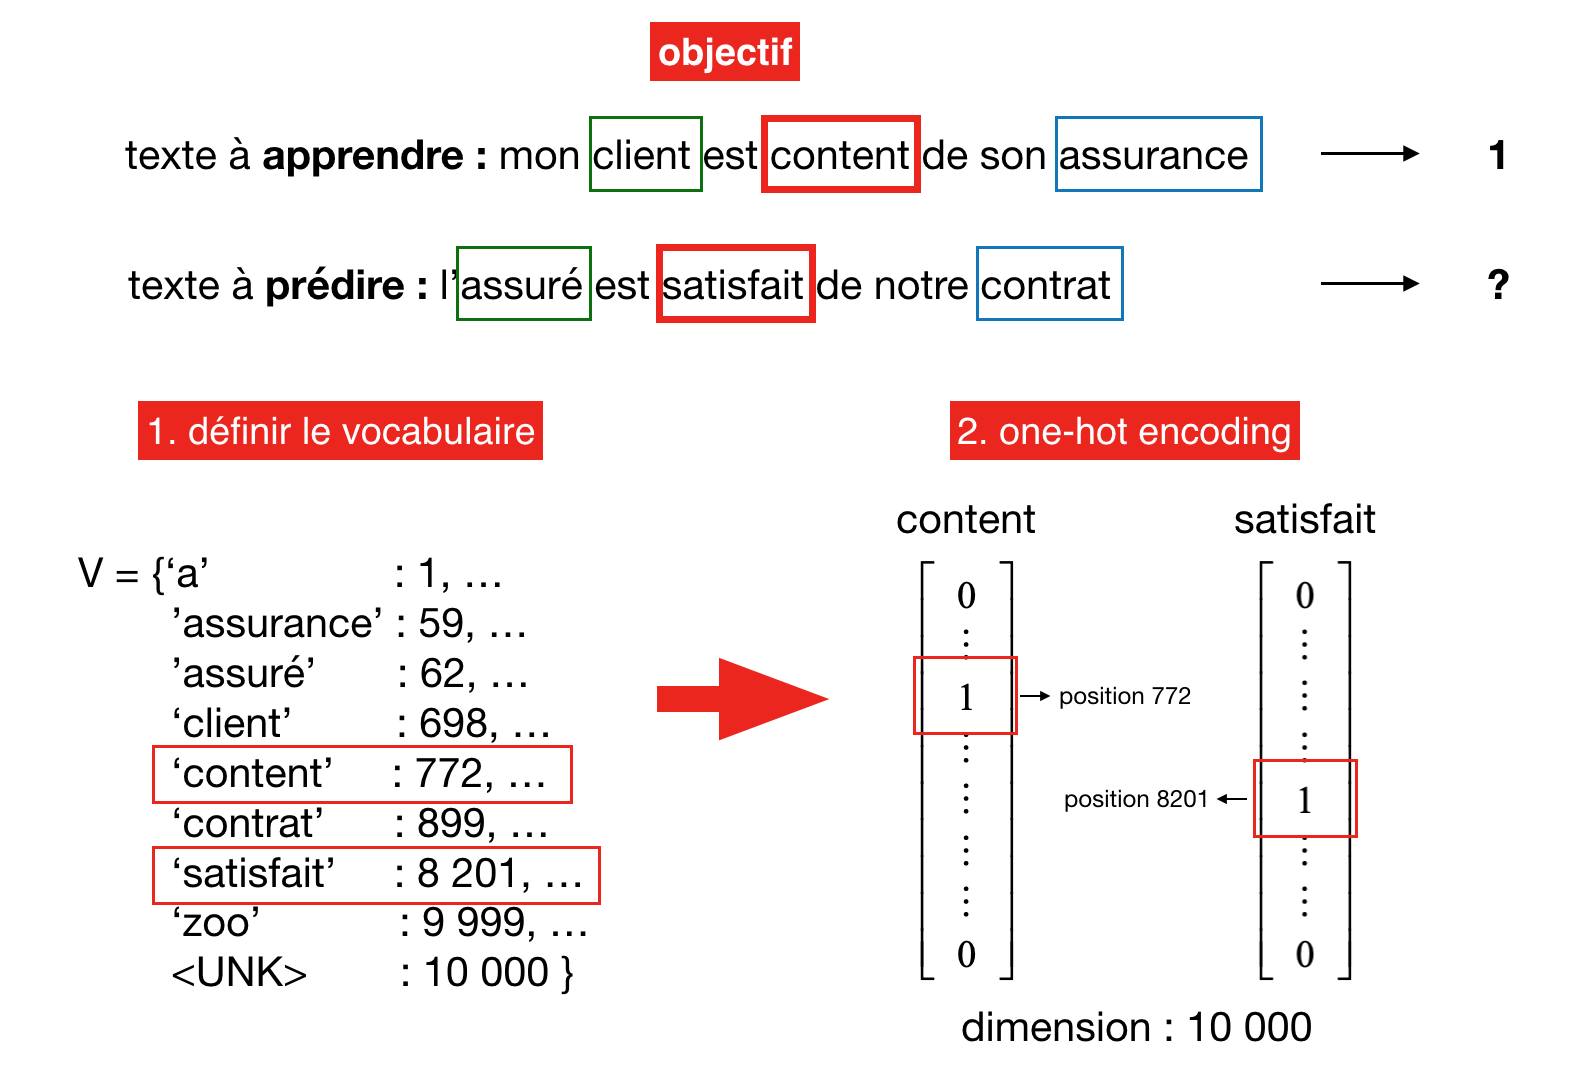

In [28]:
Image("img/vectBOW3.png", width=750, height = 200)

**remarques :**

- **approche naïve de vectorisation des mots** : approche one-hot, approche TF-IDF

- one-hot et TF-IDF sont des vecteurs **creux** (*sparse* en anglais) de grandes dimensions

- one-hot et TF-IDF **sauvegardent** les mots sans prendre en compte le contexte : vect("content") $\neq$ vect("satisfait")

**solution :** approche word embedding

### Word embedding

<font color = "green"><b>word embedding</b></font> (**plongement de mots** en français) : vectorisation des mots de sorte que les mots apparaissant dans des contextes similaires ont des significations apparentées

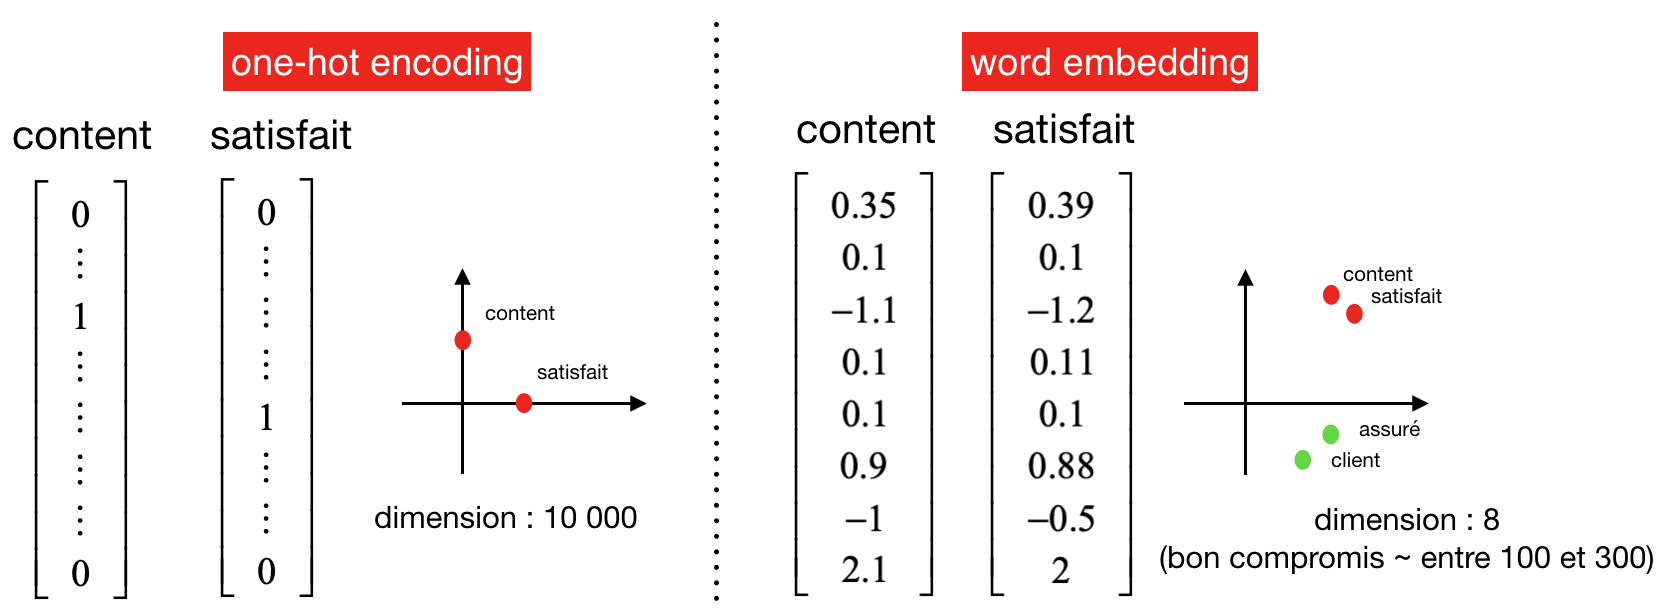

In [25]:
Image("img/vectWE.png", width=700, height = 200)

- vecteurs denses de plus petites dimensions

- mot1 $\approx$ mot2 $\implies$ word_embedding(mot1) $\approx$ word_embedding(mot2)

- word embedding populaire : **word2vec**

### word2vec

- **principe** : utiliser les **réseaux de neurones** pour construire ces vecteurs

- deux architectures de réseaux de neurones word2vec : **continuous bag-of-words** (CBOW) ou **skip-gram**

- <font color = "green"><b>modèle CBOW</b></font> : cherche à prédire un mot à partir du contexte

- <font color = "green"><b>modèle skip-gram</b></font> : cherche à prédire les mots du contexte à partir d'un mot central

- <font color = "green"><b>contexte</b></font>, <font color = "green"><b>cible</b></font> : 

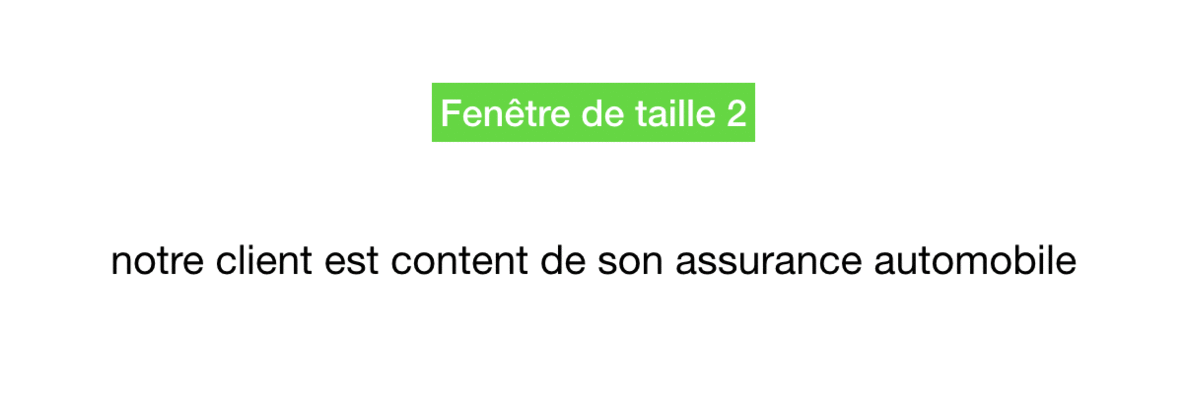

In [43]:
display(Image("img/context_word.gif.png", width=500, height = 200))

**Introduction au CBOW**

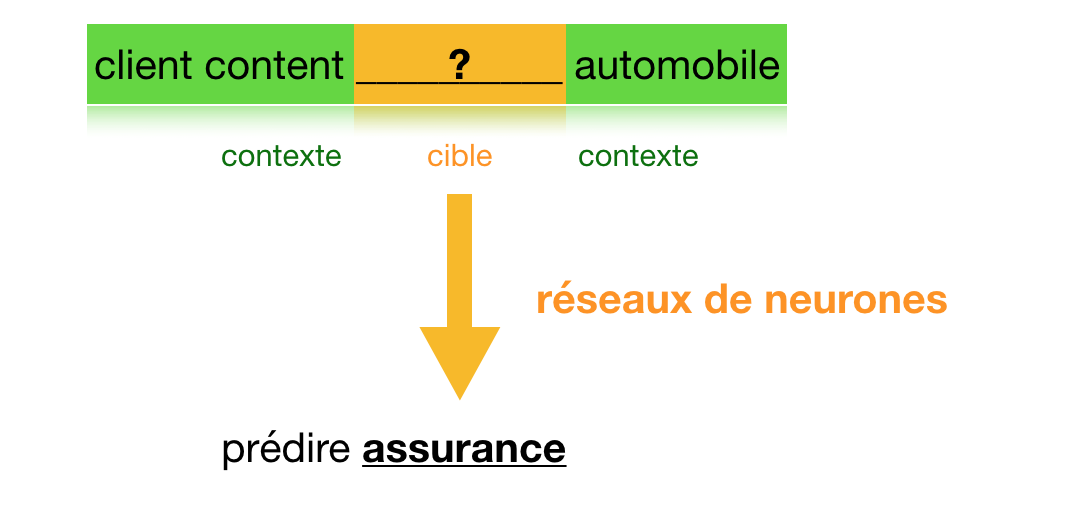

In [29]:
display(Image("img/CBOW_1.png", width=500, height = 200))

**CBOW**

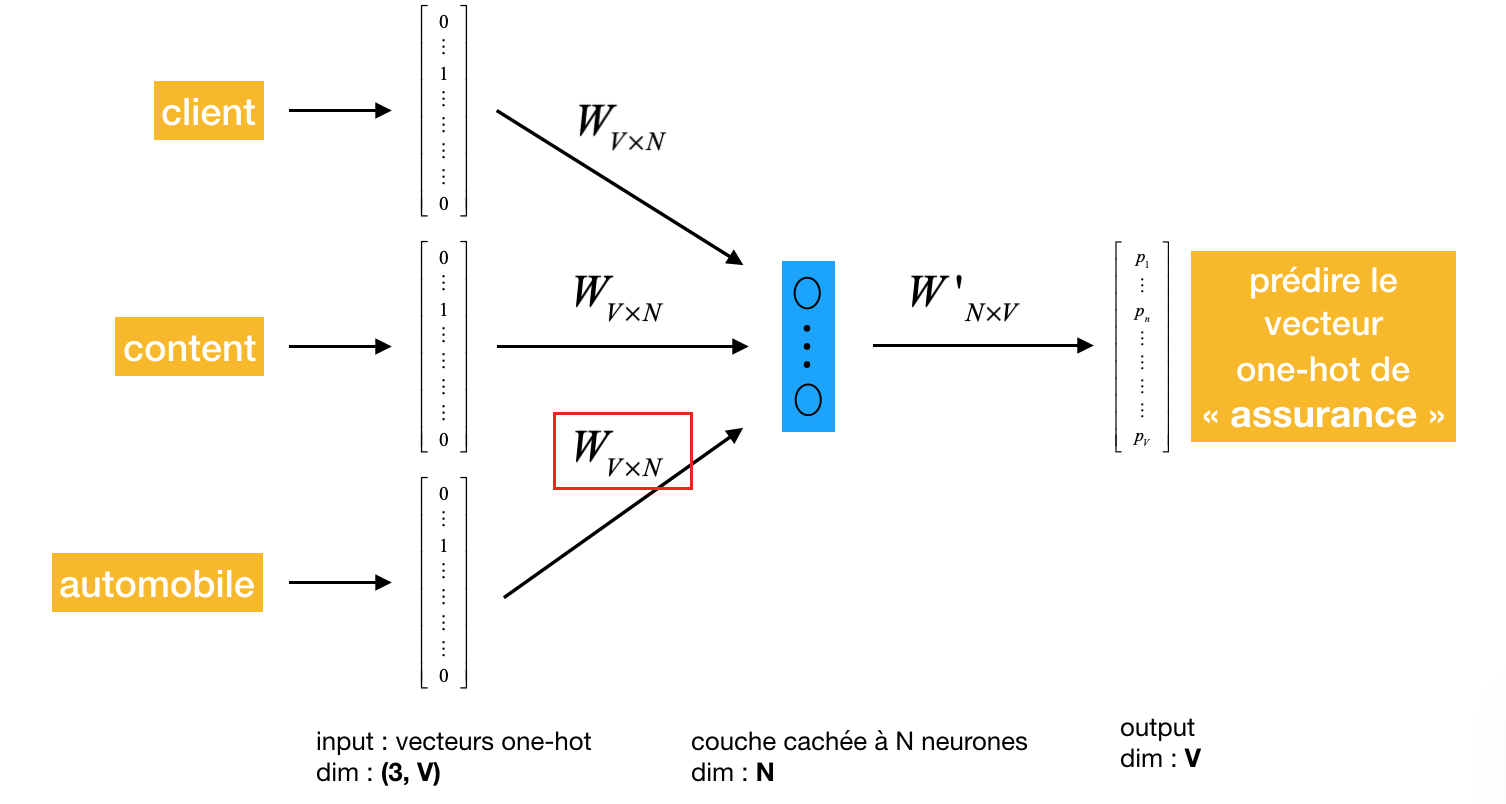

In [30]:
display(Image("img/CBOW_2.png", width=700, height = 200))

**Introduction au skip-gram**

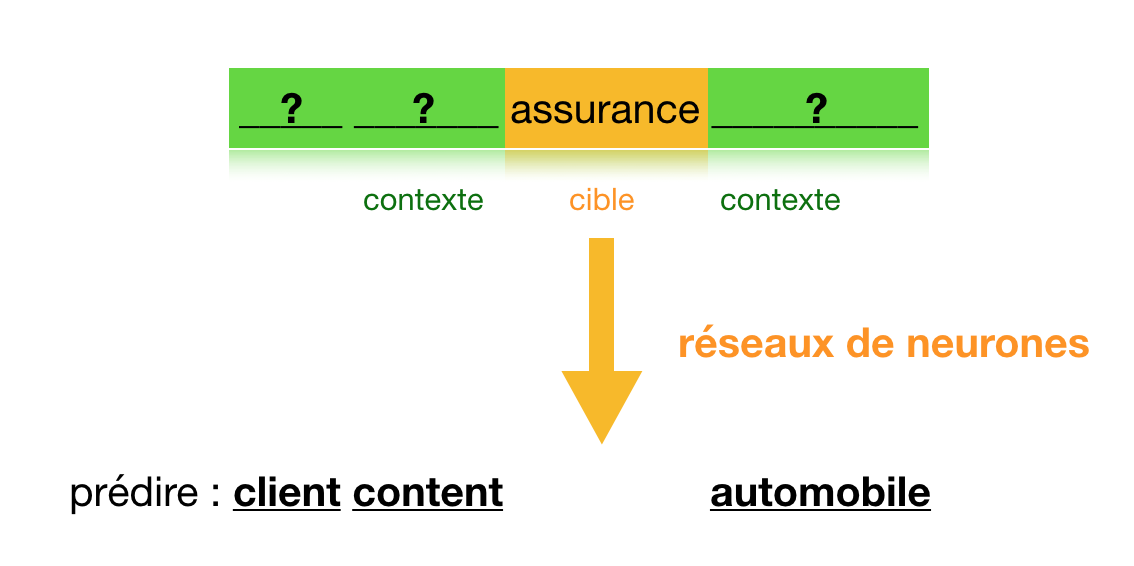

In [31]:
Image("img/SG_1.png", width=500, height = 200)

**Skip-gram**

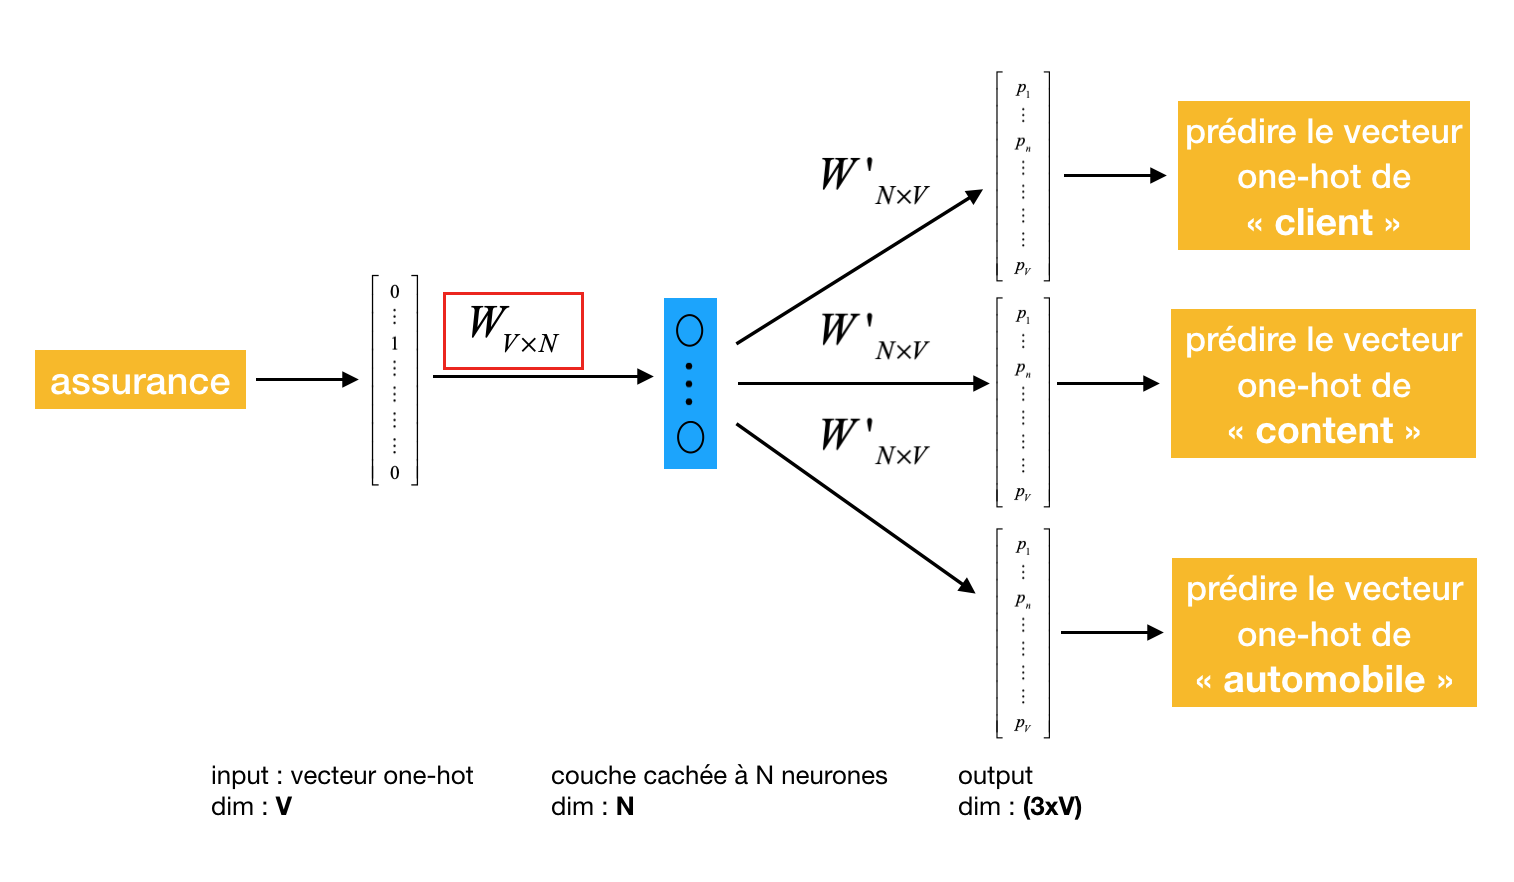

In [32]:
Image("img/SG_2.png", width=700, height = 200)

**Skip-gram : un peu de mathématiques**

- prédire les **mots du contexte** sachant le mot central :

$$p(w_{t-h}, \dots, w_{t+h} \ |\  w_t; \theta) = \prod\limits_{-h \leq k\leq h \ ,\ k\neq0} p(w_{t+k}\ | \ w_t ; \theta) $$

- calculer (et maximiser) la proba du paramètre sachant les mots : **vraisemblance**
$$L(\theta) = \prod\limits_{t=1,\dots, T} p(w_{t-h}, \dots, w_{t+h} \ |\  w_t; \theta) = \prod\limits_{t=1,\dots, T} \prod\limits_{-h \leq k\leq h \ ,\ k\neq0} p(w_{t+k}\ | \ w_t ; \theta)$$

- **log-vraisemblance** :
$$\mathcal{L}(\theta) = -\frac{1}{T}\log L(\theta) = -\frac{1}{T}\sum\limits_{t=1,\dots,T}\sum\limits_{-h\leq k\leq h\ , \ k\neq0}\log p(w_{t+k}\ | w_t ; \theta)$$

- **softmax** et **paramètre**:
$$p(w_O\ | \ w_I) = \frac{e^{<{v'}_{w_O}\ ,\ v_{w_I}>}}{\sum\limits_{w\in V}e^{<{v'}_{w}\ ,\ v_{w_I}>}} \ , \ \theta = [{v}_{w_1}, \cdots, v_{w_{|V|}}, {v'}_{w_1}, \cdots] \in \mathbb{R}^{2\cdot N\cdot|V|}$$

- algorithme de **descente de gradient** pour entraîner notre modèle

- **problème** : le calcul de softmax est trop long

- **solutions** : **softmax hierarchique** ou **negative sampling**

<font color = "green"><b>Softmax hierarchique</b></font> :

https://www.quora.com/What-is-hierarchical-softmax

<font color = "green"><b>Negative sampling</b></font> :

http://mediamining.univ-lyon2.fr/people/guille/word_embedding/skip_gram_with_negative_sampling.html

### classification de textes avec word2vec

**agrégation** puis **classification classique** :

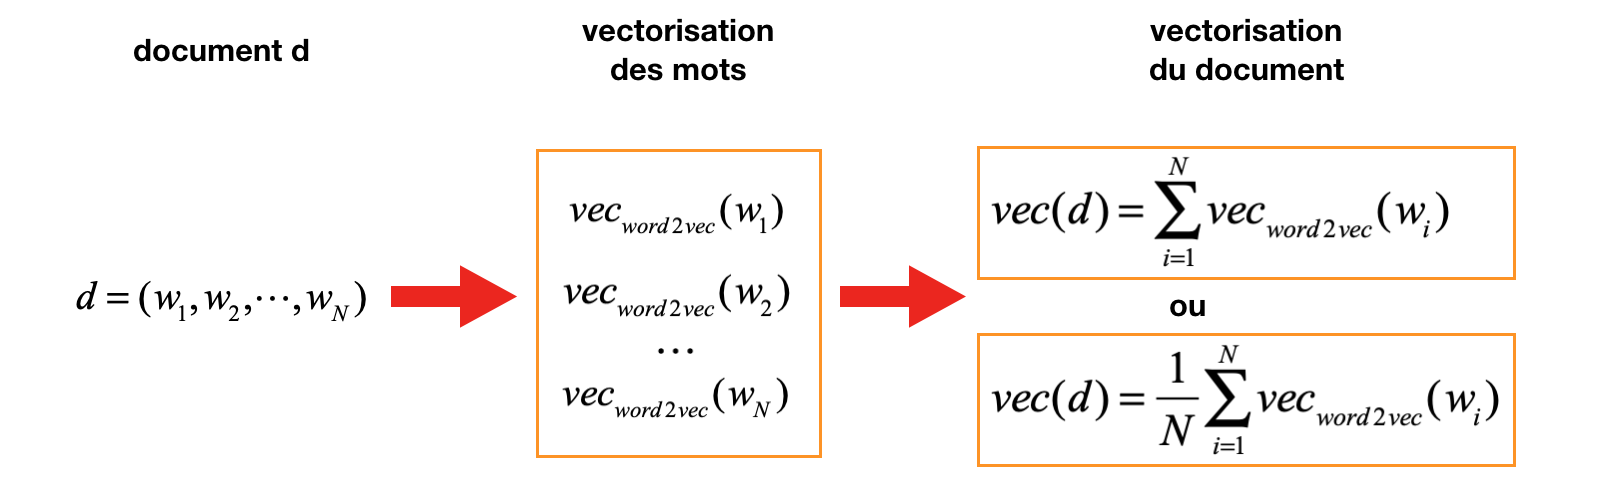

In [27]:
Image("img/doc_som_moy.png", width=650, height = 200)

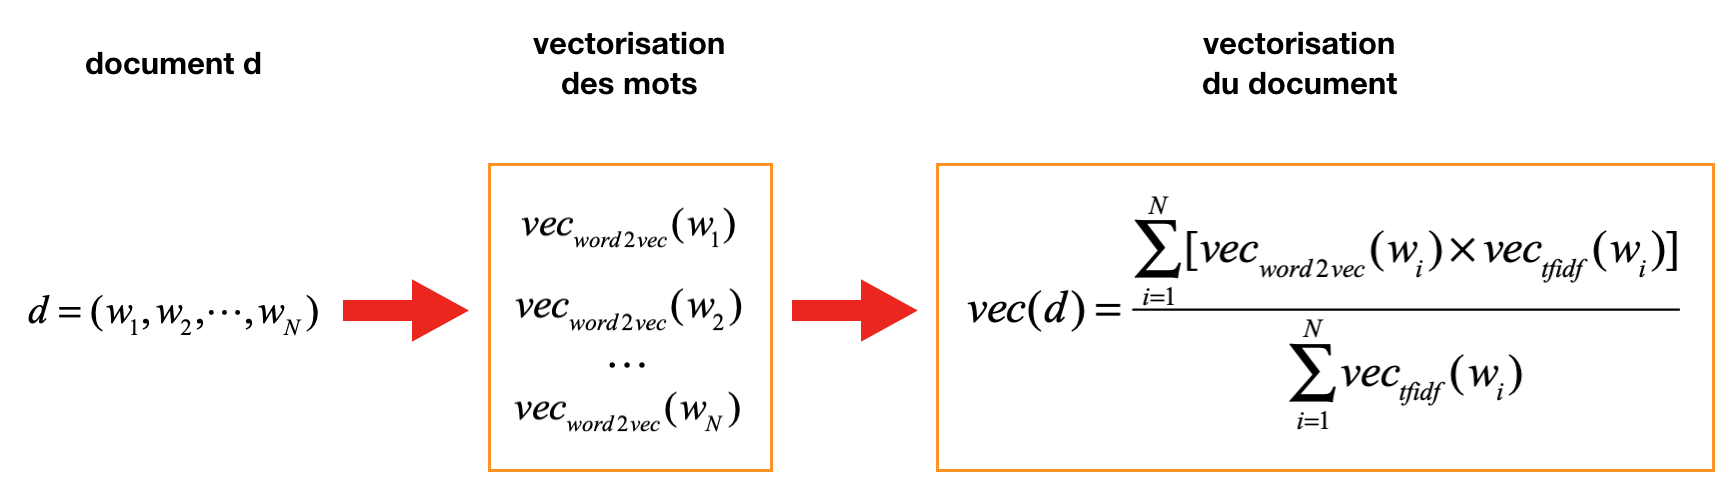

In [28]:
Image("img/doc_som_moypond.png", width=700, height = 200)

**doc2vec** puis **classification classique** : voir <font color = "red"><b>section suivante</b></font> pour le modèle doc2vec

classification avec les **réseaux de neurones** : voir <font color = "red"><b>cours 2</b></font> pour les modèles séquentiels

### doc2vec

vectorisation des **documents** (resp. des mots) de sorte que les **documents** (resp. les mots) apparaissant dans des contextes similaires ont des significations apparentées

<font color = "green"><b>Distributed Memory (DM)</b></font> : 

$$p(w_i\ | \ w_{i-h}, \dots, w_{i+h}, d)$$

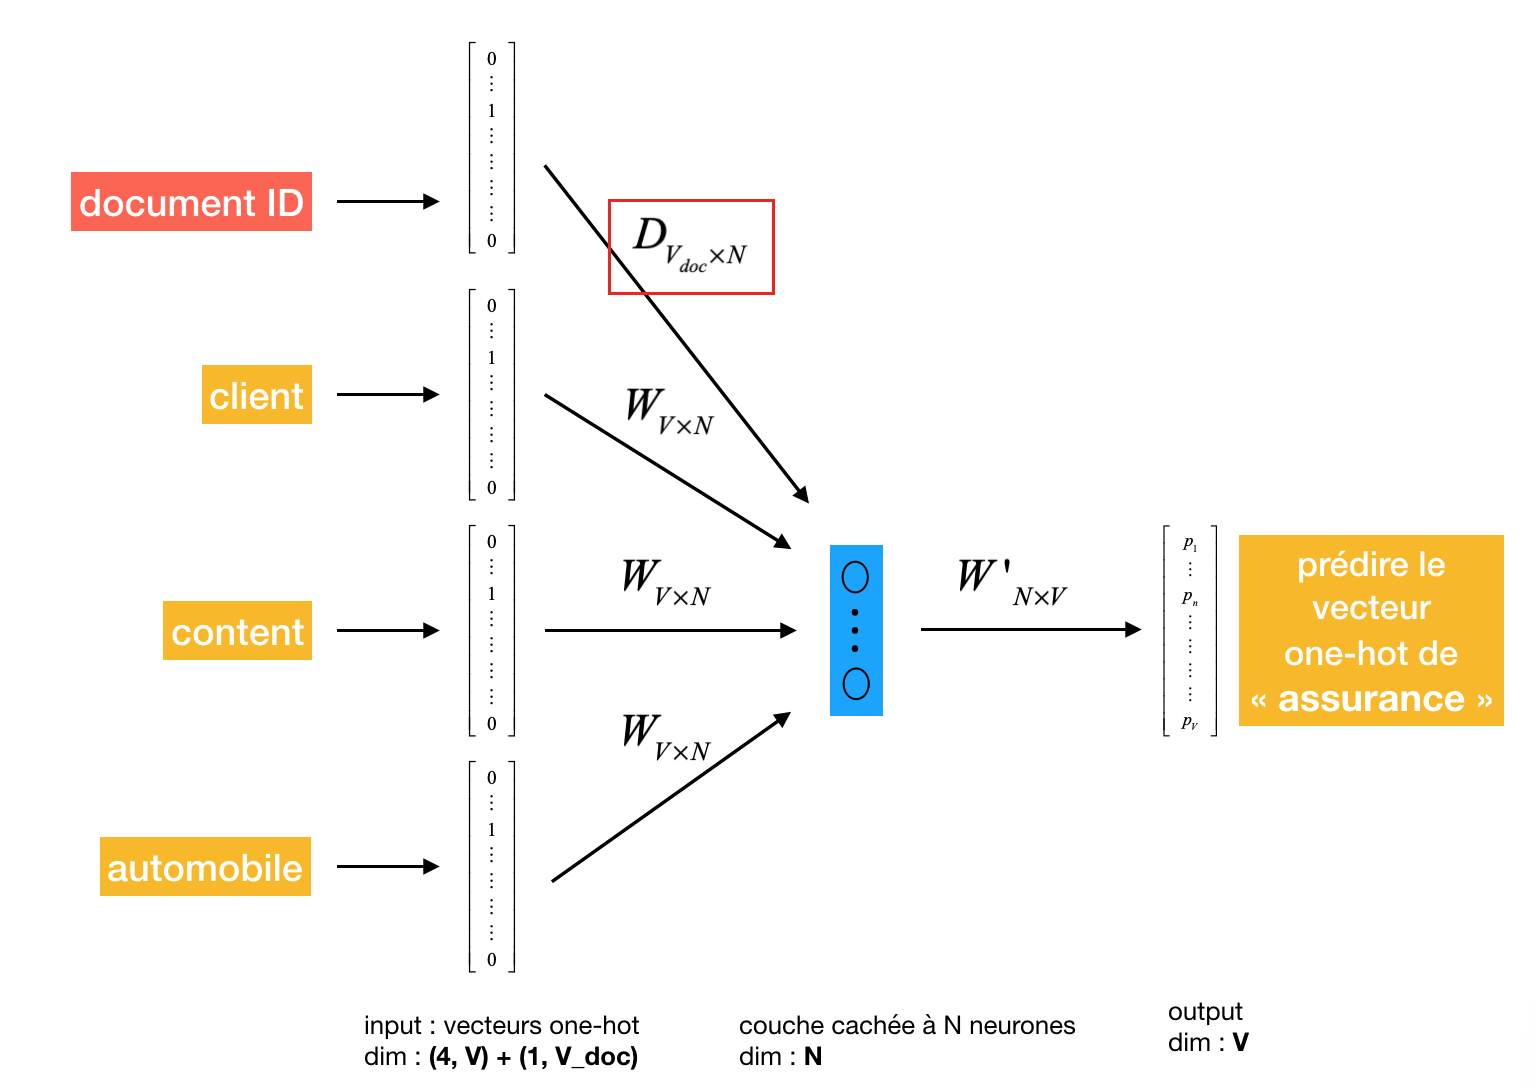

In [33]:
Image("img/DM.png", width=700, height = 200)

<font color = "green"><b>Distributed Bag-Of-Words (DBOW)</b></font> : 

$$p(w_{i-h}, \dots, w_{i+h} \ | \ d)$$

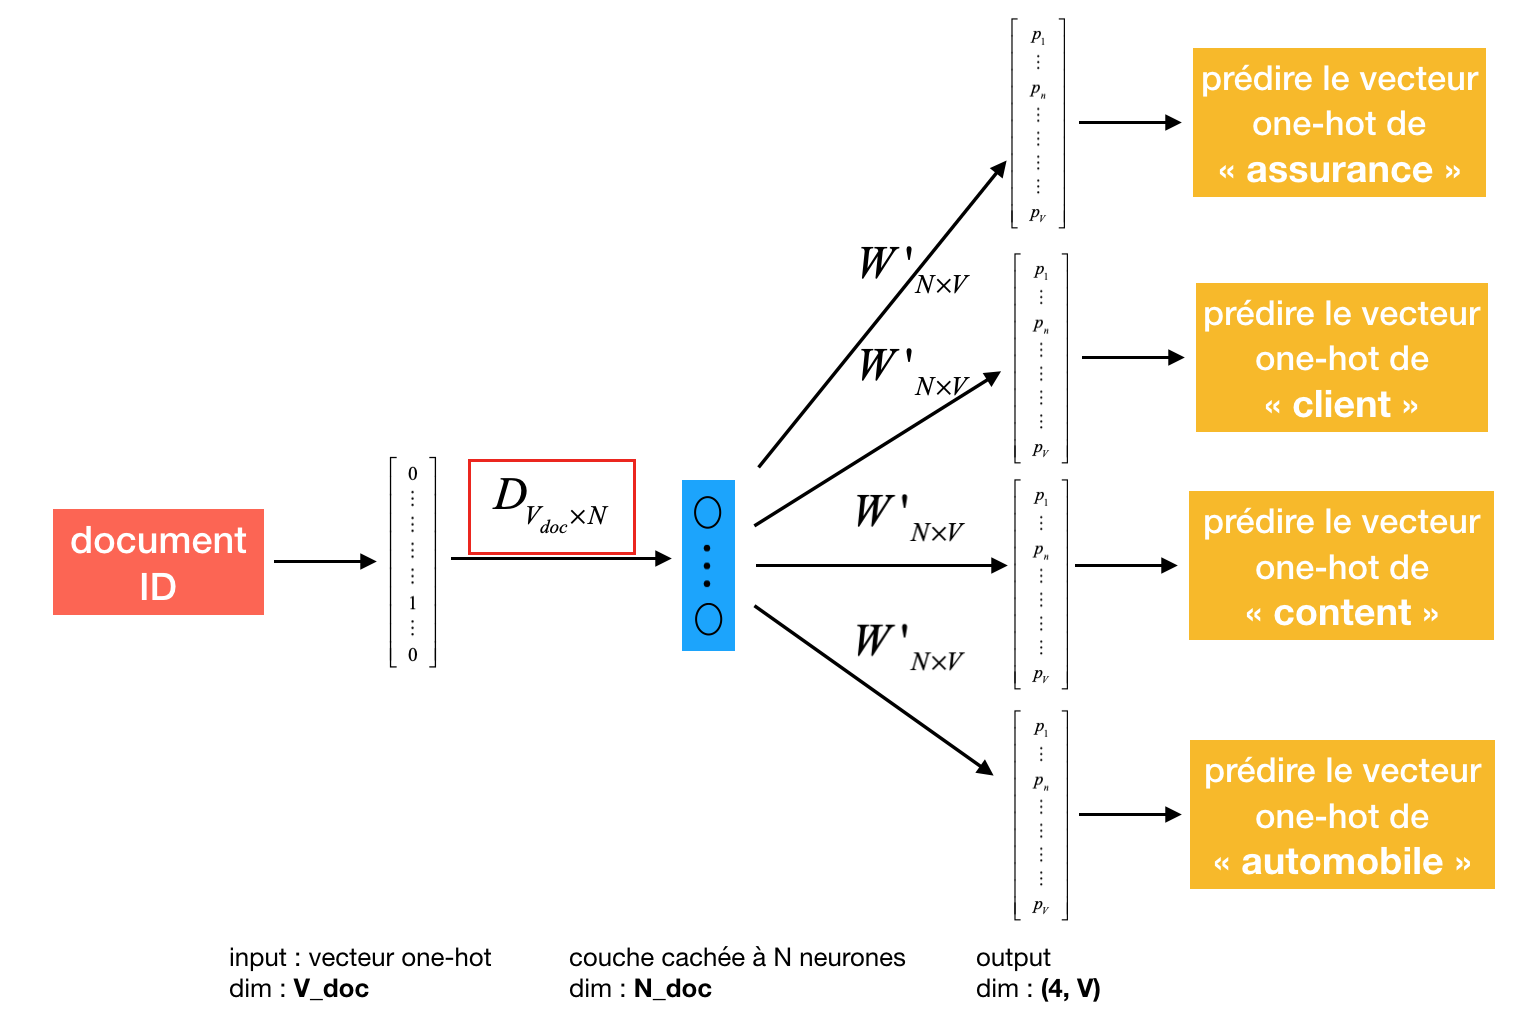

In [34]:
Image("img/DBOW.png", width=700, height = 200)

**Résumé**

- word embedding : 
    - word2vec : **CBOW** et **skip-gram**
- doc embedding : 
    - doc2vec : **DM** et **DBOW**
- classification de textes avec ces embeddings

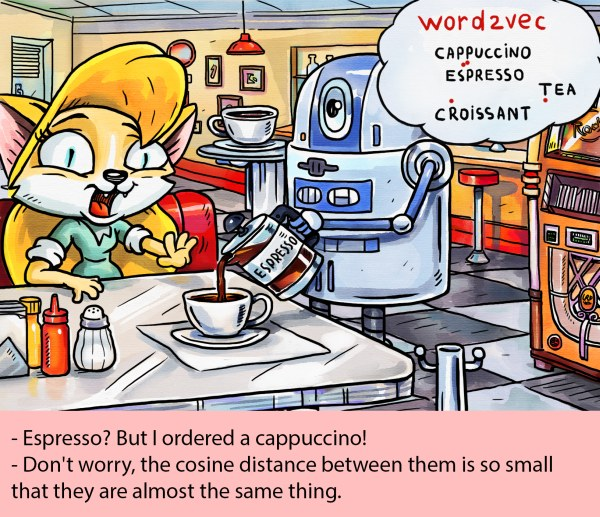

In [11]:
Image("img/cartoon_w2v.png", width=580, height = 200)

auteur : Dmitry Malkov, data scientist et dessinateur de BD chez Data Monsters

## 2. Topic modeling
<font color = "grey">*cacher le code</font>

In [2]:
from IPython.display import HTML, Image
HTML('''<script>code_show=true; function code_toggle() {if (code_show){$('div.input').hide();} else {$('div.input').show();}code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="cacher / afficher code"></form>''')

### représentation vectorielle des documents / topics

- <font color = "green"><b>topic modeling</b></font> (**modèle thématique** en français) : processus d'identification des topics (ou thèmes) permettant de décrire un ensemble de documents

**hypothèses** :
- chaque **document** est vu comme un **mélange de topics**
- chaque **topic** est vu comme une collection de mots

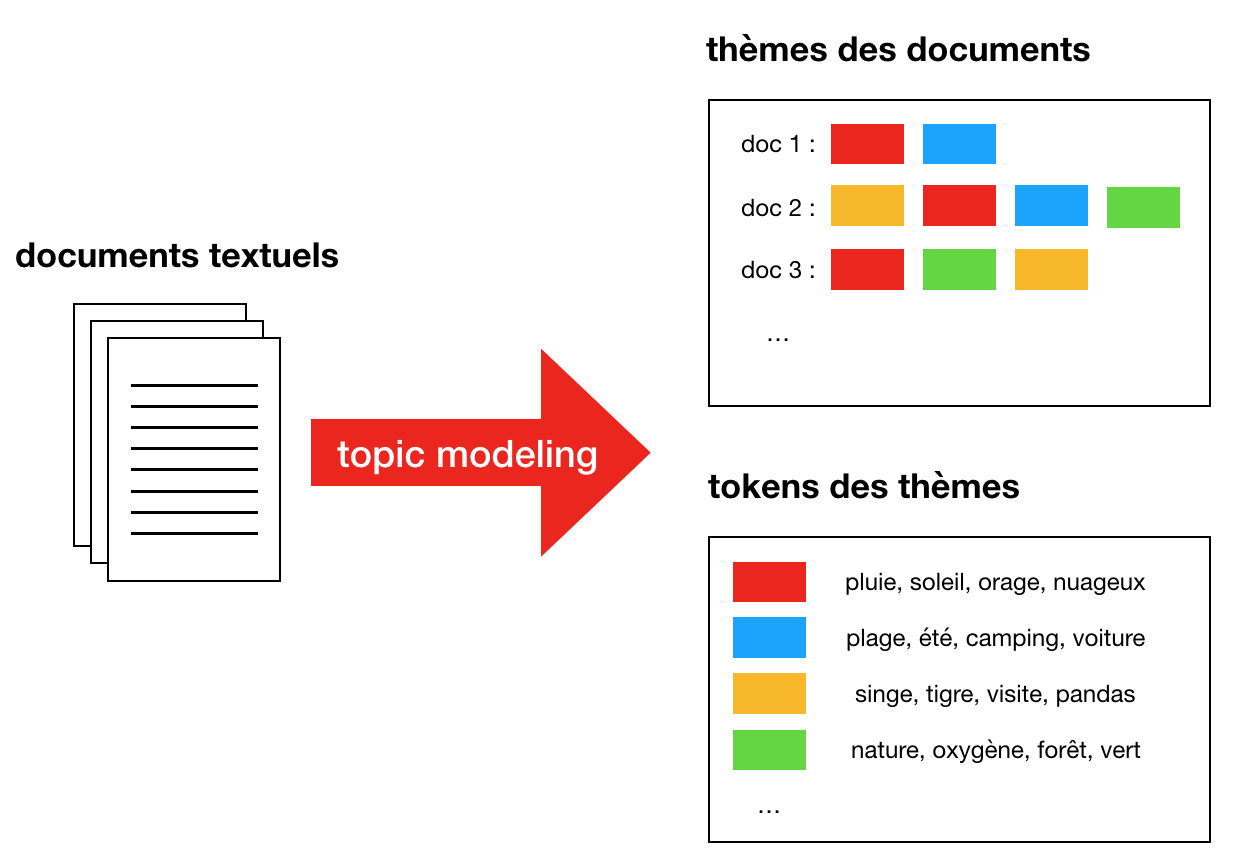

In [3]:
Image("img/TM.png", width=350, height = 200)

**topic models** les plus populaires : LSA, PLSA, LDA

### Latent Semantic Analysis (LSA)

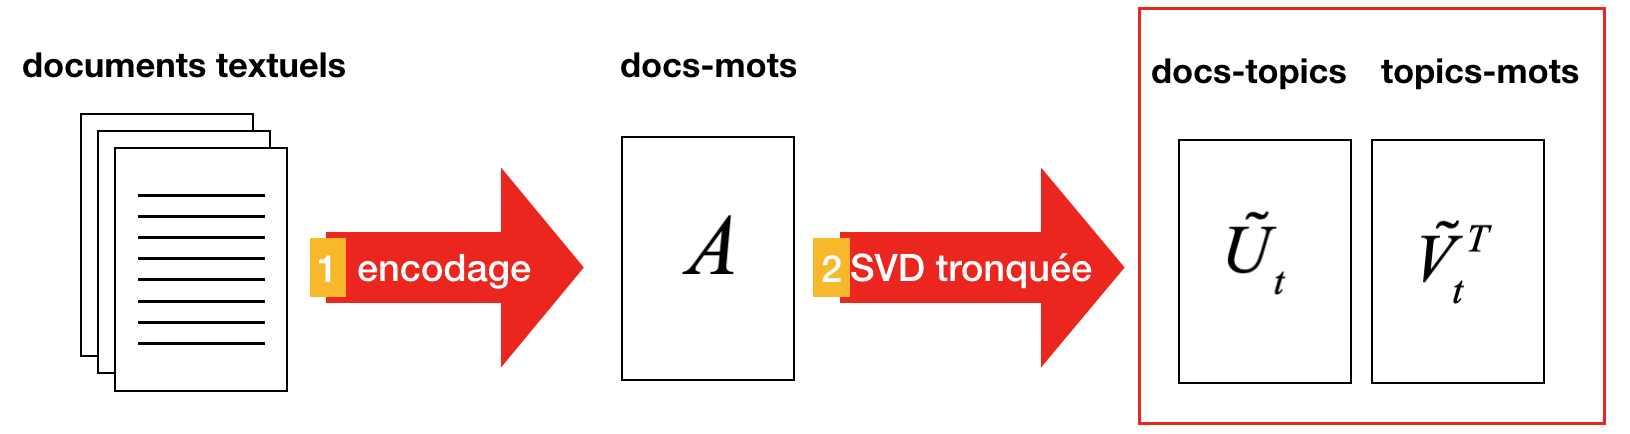

In [12]:
Image("img/LSA_schema.png", width=700, height = 200)

**1. encodage en une matrice A**

- encodage par one-hot (voir <font color = "red">introduction</font>)

- encodage par TF-IDF (voir <font color = "red">introduction</font>)

**2. factorisation de la matrice A par SVD tronquée**

- <font color = "green"><b>Décomposition en Valeurs Singulières</b></font> (SVD) :

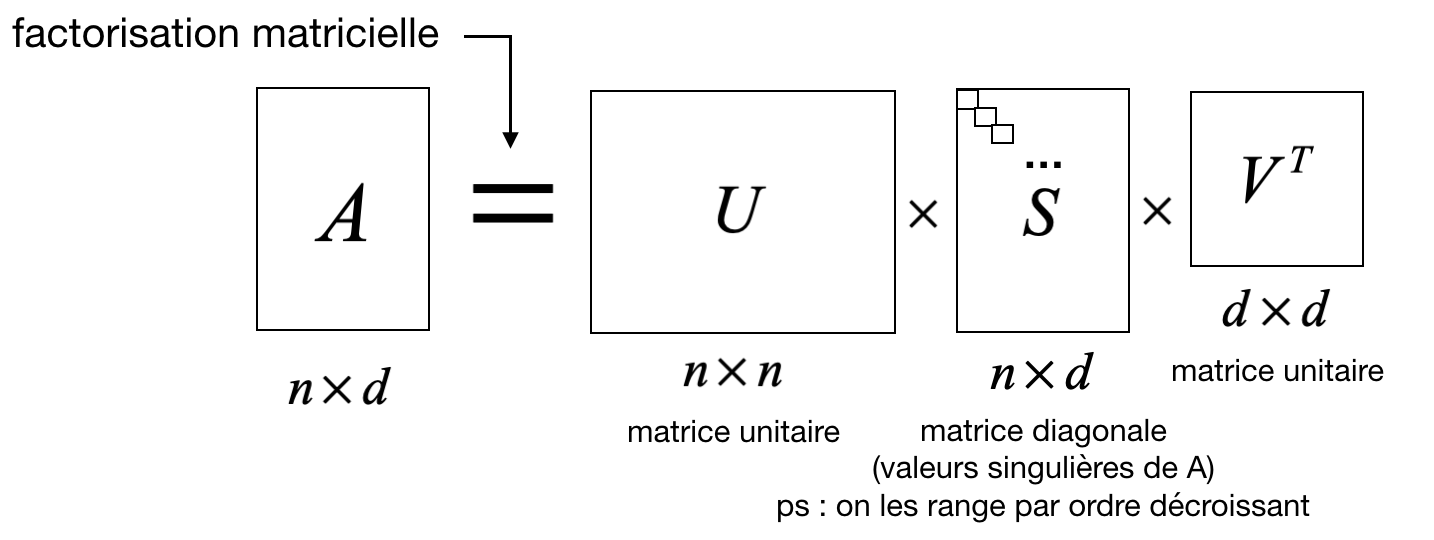

In [4]:
Image("img/SVD.png", width=480, height = 200)

- <font color = "green"><b>SVD tronquée</b></font>

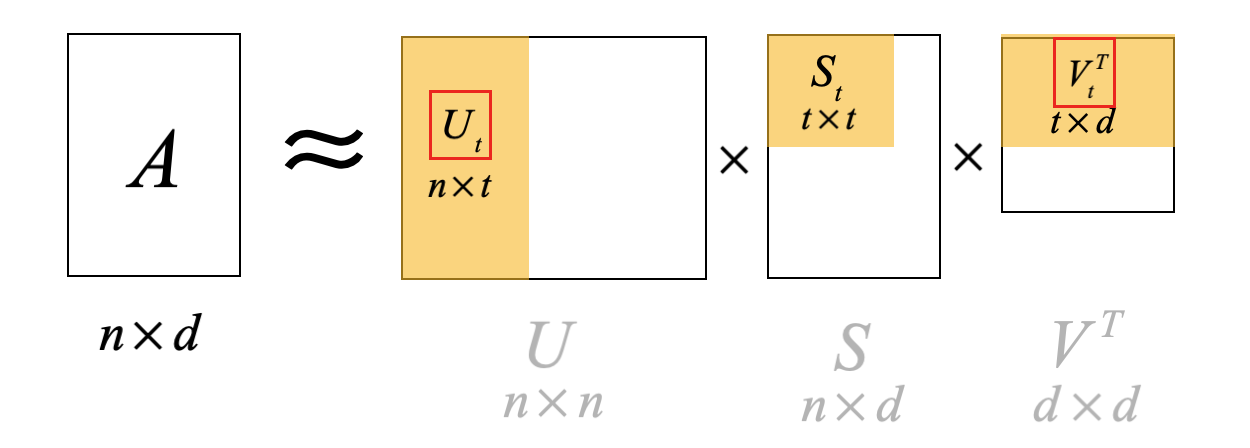

In [5]:
Image("img/SVDt.png", width=480, height = 200)

**Comment choisir $\tilde{U}_t$ et $\tilde{V}_t^T$ ?** 

- **solution 1** : 

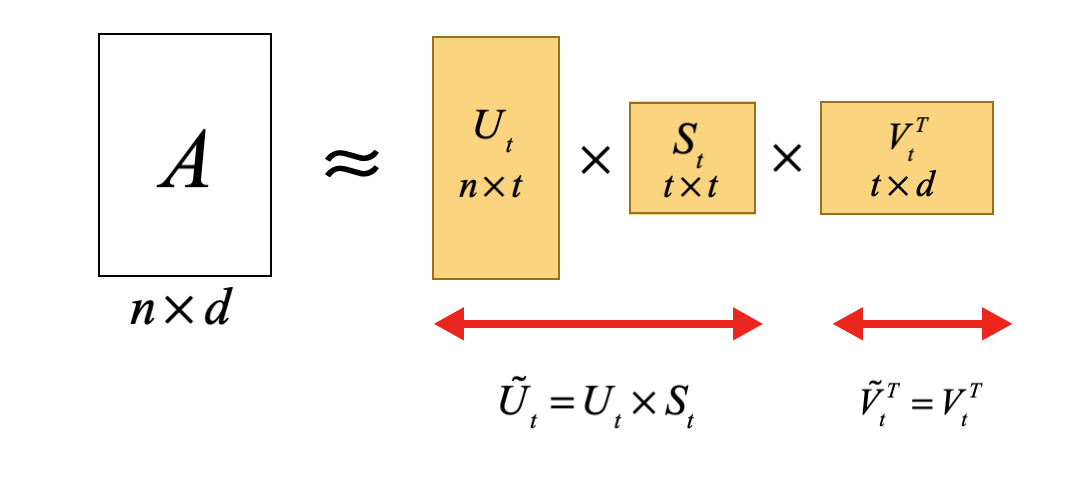

In [22]:
Image("img/SVDt2.png", width=410, height = 200)

- **solution 2** : 

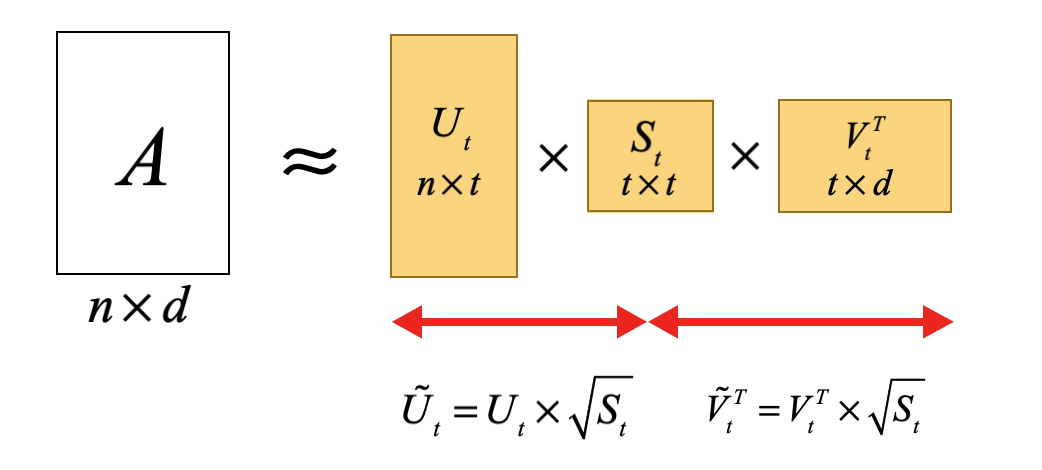

In [21]:
Image("img/SVDt1.png", width=410, height = 200)

**Remarques** : 

- approche **algèbre linéaire**

- évaluer la similarité entre les **documents** (similarité cosinus)

- évaluer la similarité entre les **mots** (similarité cosinus)

**désavantages** :

- vecteurs difficilement **interpretable**

- besoin d'un **grand ensemble de docs et de vocabulaires** pour obtenir une bonne précision

### Probabilistic Latent Semantic Analysis (PLSA)

**Idée** : trouver un modèle probabiliste avec des **topics latent** qui peut générer les observations du matrice mots-docs

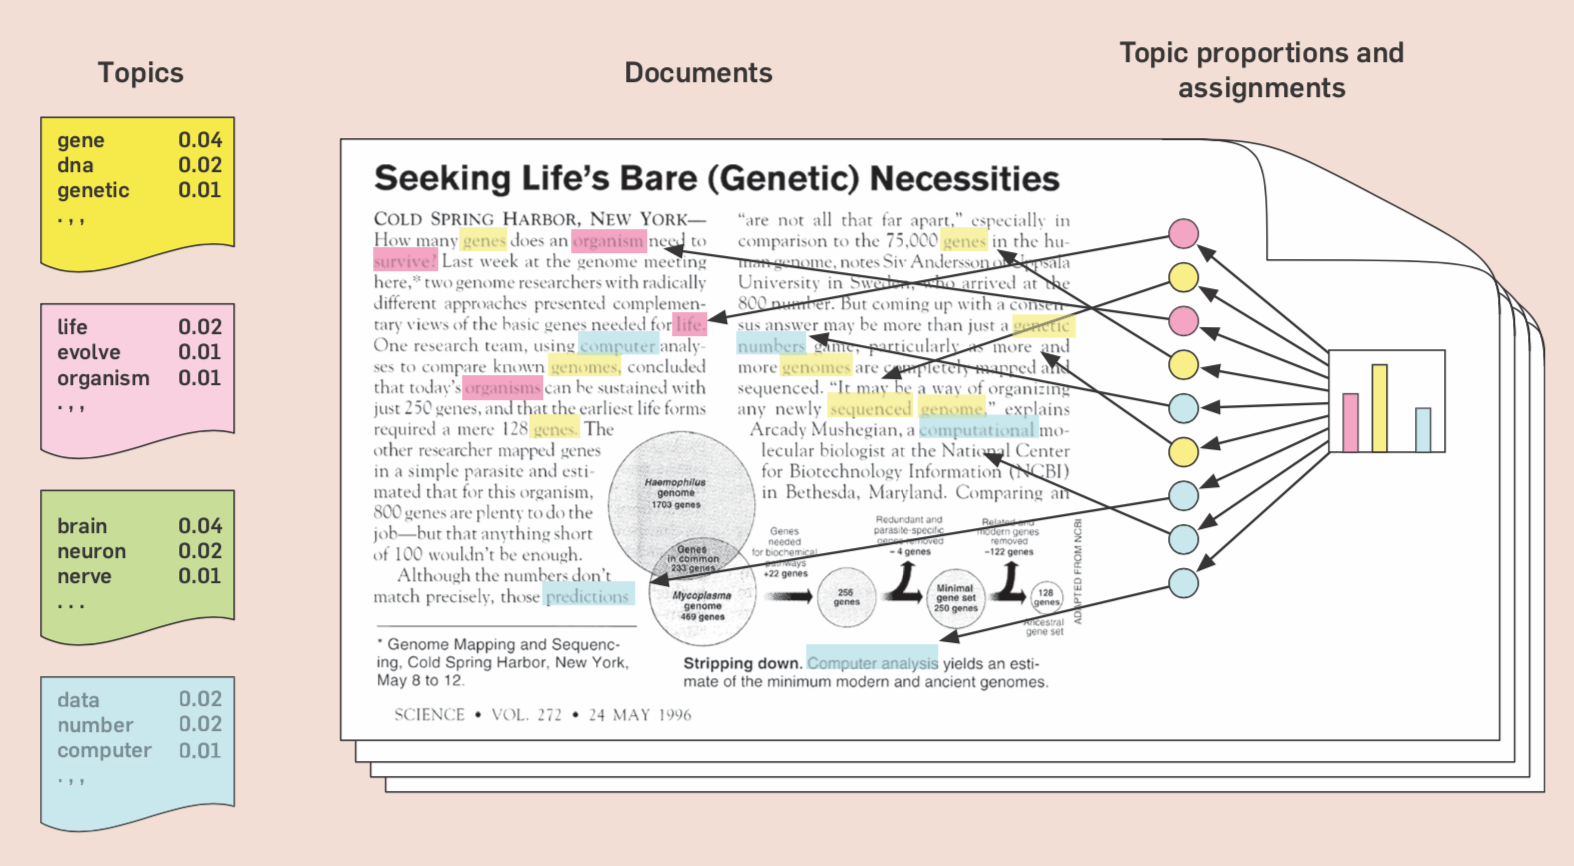

In [30]:
Image("img/topic_generated.png", width=600, height = 200)

Par David Blei, Probabilistic topic models, 2012

**Formellement :**

**Input** : collection de textes **bag-of-words** : 

$$n_{wd} = \text{ nombre d'occurence du mot } w \text{ dans le document } d $$

**Trouver** : probabilité que le **mot $w$** soit dans un **topic $t$** :

$$\phi_{wt} = p(w|t)$$

probabilité que le **topic $t$** soit dans le **document $d$** :

$$\theta_{td} = p(t|d)$$


**Hypothèse** : un document $d = (w_1, \dots, w_W)$ est écrit de la manière suivante :

- générer les topics $t \sim Multinomial(\theta_{\cdot d})$

- générer les mots $w\sim Multinomial(\phi_{\cdot t})$

**modèle graphique associé** au PLSA :

Un modèle graphique est une représentation d'objets probabilistes. C'est un graphe qui représente les dépendances de variables aléatoires. 

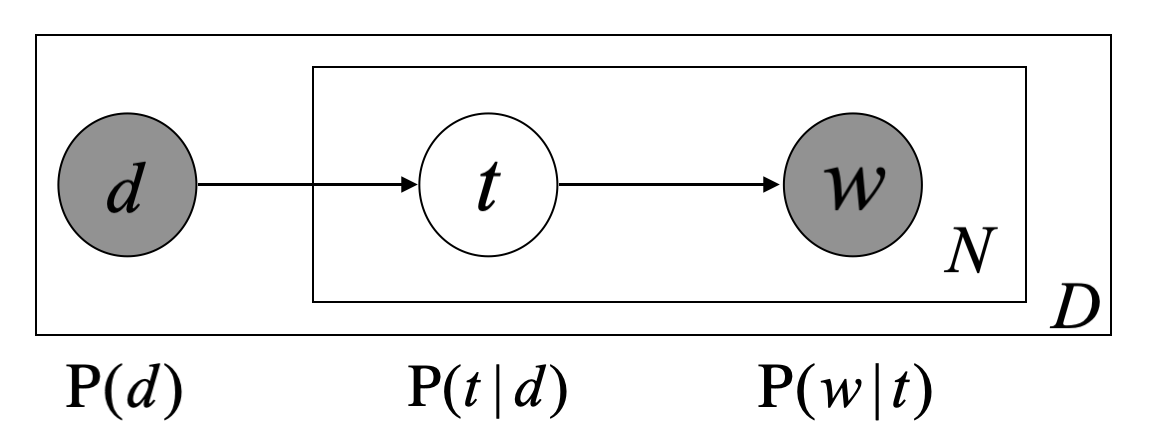

In [33]:
Image("img/PLSA_GM.png", width=400, height = 200)

**écriture probabiliste**

- $p(w \ | \ d) = \sum\limits_{t\in T} p(w \ |\ t, d)\cdot p(t \ | \ d) = \sum\limits_{t\in T} p(w \ |\ t)\cdot p(t \ | \ d) = \sum\limits_{t\in T} \phi_{wt}\cdot\theta_{td}$

- $p(d, w) = p(d)\cdot p(w \ | \ d) = p(d)\sum\limits_{t\in T} \phi_{wt}\cdot\theta_{td}$

**écriture matricielle**

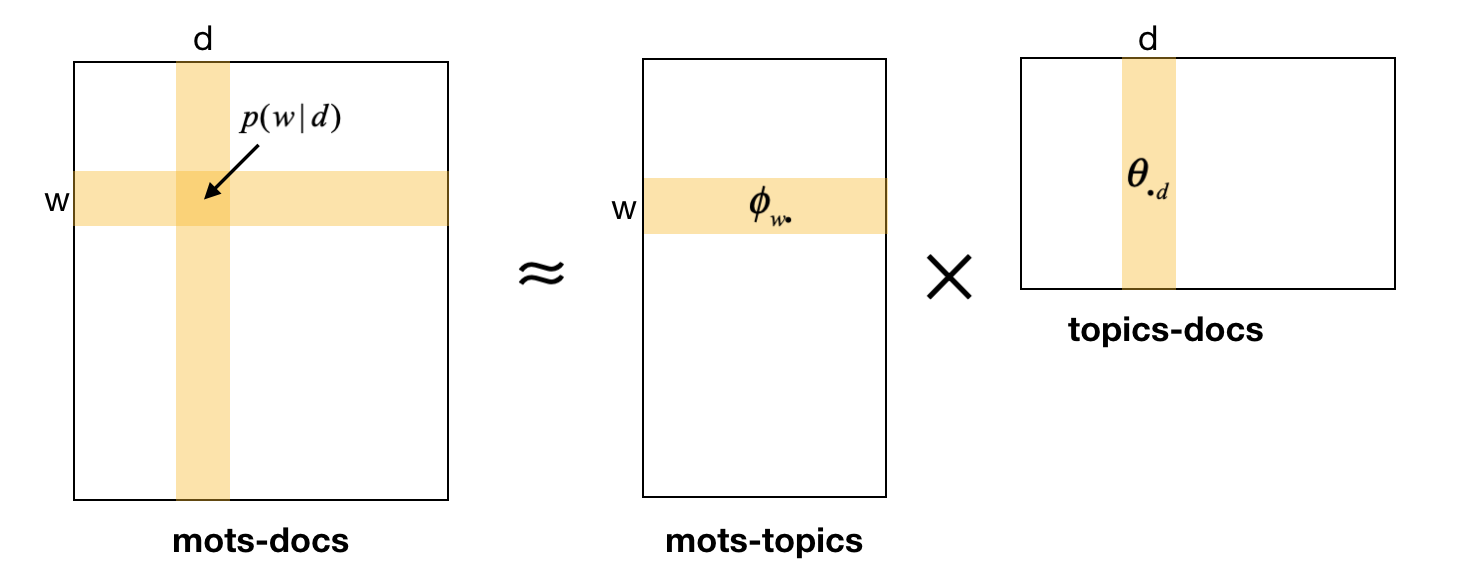

In [6]:
Image("img/PLSA.png", width=500, height = 200)

- **comment entraîner ce modèle ?**

**Entraînement du modèle PLSA**

posons $\Theta = [\cdots\theta_{ij}\cdots]$ et $\Phi = [\cdots\phi_{ij}\cdots]$

- calcul de la **vraisemblance** (objectif maximiser ce terme) :
$$L(\Theta, \Phi) = \prod_d\prod_w p(d,w)^{n_{wd}} = \prod_d p(d)\prod_w p(w|d)^{n_{wd}}$$

- calcul de la **log-vraisemblance** (objectif maximiser ce terme) :
$$\mathcal{L}(\Theta, \Phi) = \sum_d\sum_w n_{wd} \log\sum_t\phi_{wt}\cdot\theta_{td}$$

**problème** : <font color ="red">$\log\sum_t$</font> dur à maximiser

**solution** : **algorithme EM** - https://fr.wikipedia.org/wiki/Algorithme_esp%C3%A9rance-maximisation

### Latent Dirichlet Allocation (LDA)

https://meritis.fr/ia/topic-model-une-machine-peut-elle-comprendre-le-sujet-dun-article/

- topic modeling basé sur l'inférence **bayésienne** : $\phi_t = (\phi_{wt})_{w\in W}$ et $\theta_d = (\theta_{td})_{t\in T}$ sont des variables aléatoires latentes de la distributions Dirichlet :

$\theta_d \sim Dir(\alpha)$, $\phi_t \sim Dir(\beta)$ avec :

$$Dir(\phi_t| \beta) = \frac{\Gamma(\sum_w\beta_w)}{\prod_w \Gamma(\beta_w)}\prod_w \phi_{wt}^{\beta_w - 1}$$

$$Dir(\theta_d| \alpha) = \frac{\Gamma(\sum_t\alpha_t)}{\prod_t \Gamma(\alpha_t)}\prod_t \phi_{td}^{\alpha_t - 1}$$

**modèle graphique associé** au LDA :

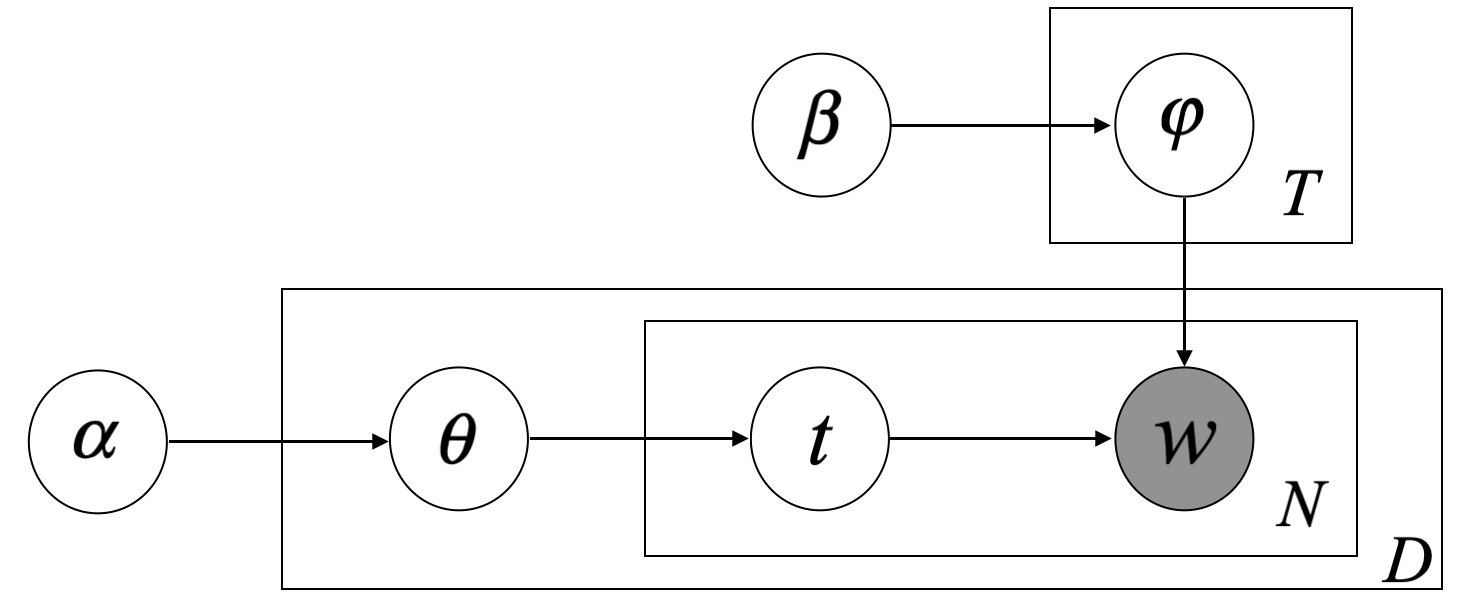

In [36]:
Image("img/LDA_GM.png", width=500, height = 200)

- Q : **comment estimer $\theta_d$ et $\phi_t$ ?**

- R : **Gibbs sampling** (partie de la famille MCMC) - https://fr.wikipedia.org/wiki/%C3%89chantillonnage_de_Gibbs

**Résumé :**

- **topic modeling**

- topic models : **LSA, PLSA, LDA**

- section suivante : TP sur le topic modeling

## 3. TP : Topic modeling

<font color = "grey">*afficher le code</font>

In [2]:
from IPython.display import HTML, Image
HTML('''<script>code_show=true; function code_toggle() {if (code_show){$('div.input').hide();} else {$('div.input').show();}code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="cacher / afficher code"></form>''')

In [7]:
# nous allons importer les librairies
import os, time, string, nltk, gensim
from tqdm import tqdm
import pandas as pd
import numpy as np

# nous importons aussi les package pour le preprocessing
nltk.download("punkt", quiet=True)
nltk.download("stopwords", quiet=True)
nltk.download("snowball_data", quiet=True)

True

### 3.1. Charger les données

Nous avons défini une fonction ``load_data`` qui charge et mélange les données IMDb dans un pandas dataframe :

In [51]:
def load_data(data_dir_path_str):
    texts = []
    data_dir_path_str = "/Users/Faugon/Documents/3_enseignements/institut_des_actuaires/datasets/aclImdb/train"
    dir_name = os.path.join(data_dir_path_str, "unsup")
    for fname in tqdm(os.listdir(dir_name)):
        if fname[-4:] == ".txt":
            f = open(os.path.join(dir_name, fname), "r", encoding = "utf-8")
            texts.append(f.read())
            f.close()

    data_df = pd.DataFrame({"review": texts})
    return data_df

Chargeons et mélangeons les données IMDb :

In [52]:
# Chemin du repertoire du dossier "sclImbd/train"
imbd_dir = ".../aclImdb/train" # A REMPLIR

# Charger et melanger les donnees
data_df = load_data(imbd_dir).sample(frac = 1).reset_index(drop = True)

100%|██████████| 50000/50000 [00:09<00:00, 5058.17it/s]


Affichons les 5 premières lignes de notre DataFrame :

In [53]:
data_df.head(5)

,review
0,"Giant radioactive monsters, while apparently p..."
1,"Somewhere in the world, women scientists are t..."
2,I don't see how CBS pays Letterman $30 million...
3,So we have Paul Naschy joining an expedition i...
4,"Bad, Bad, Awful........It was the worst film I..."


### 3.2. Nettoyer et vectoriser les documents par TF-IDF

Nettoyons les données, nous allons effectuer les étapes suivantes

- enlever les tags HTML
- enlever tous les nombres pour réduire le nombre de **tokens**
- enlever les signes de ponctuations
- enlever les caractères étranges
- mettre tous les lettres majuscules en minuscules
- enlever les **stopwords** : ce sont les petits et fréquents mots qui n'apportent aucune information pour le modèle prédictif
- enlever les larges espaces
- enlever les mots à un seul caractère
- **OPTION** : **stem** tous les mots (grâce à NLTK pour l'anglais), c'est-à-dire considérer les tokens suivant comme un seul token :
    - un verbe conjugué à différents temps ou 
    - un mot trouvé au singulier et au pluriel

In [73]:
# We import the stopwords from NLTK package
from nltk.corpus import stopwords

# We load stopwords for english from NLTK package
stopwords_lst = list(stopwords.words("english"))

# We import the stemmer from NLTK package
from nltk.stem import SnowballStemmer

# We create a stemmer for english words
english_stemmer = SnowballStemmer("english")

In [55]:
def clean_data(dataset_df, column_to_clean, stopwords_lst, stemmer = None):
    # Remove remaining HTML tags
    dataset_df["review"] = dataset_df["review"].str.replace("<.*?>", " ")
    # Remove all numbers
    dataset_df["review"] = dataset_df["review"].str.replace("(?:[+-]|\()?\$?\d+(?:,\d+)*(?:\.\d+)?\)?", " ")
    # Remove punctuation
    dataset_df["review"] = dataset_df["review"].str.replace("[" + string.punctuation + "]", " ")
    # Remove all characters that are not letters
    dataset_df["review"] = dataset_df["review"].str.replace("[^a-zA-Z\ ]", " ")
    # Convert the text to lower case
    dataset_df["review"] = dataset_df["review"].str.lower()
    # Remove stopwords
    dataset_df["review"] = dataset_df["review"].str.replace("(\s+|^)(" + "|".join(stopwords_lst) + ")(\s+|$)", " ")
    # Remove large spaces
    dataset_df["review"] = dataset_df["review"].str.replace("\s+", " ")
    # Remove leading and trailing spaces
    dataset_df["review"] = dataset_df["review"].str.replace("\s+$|^\s+", "")
    # Remove word only made of one letter
    dataset_df["review"] = dataset_df["review"].str.replace("(\s+|^)([a-z]{1})(\s+|$)", " ")
    # Stem all words
    if stemmer is not None:
        dataset_df["review"] = dataset_df["review"].apply(lambda x: " ".join([stemmer.stem(w) for w in x.split(" ")]))
    return dataset_df

data_cleaned_df = clean_data(data_df.copy(deep=True), "review", stopwords_lst)

Voyons comment sont les données après nettoyage. Affichons un review en entier :

In [72]:
print("*" * 40)
print("* Review" + " " * 30, "*")
print("*" * 40)
print(data_cleaned_df["review"][0])
print()

****************************************
* Review                               *
****************************************
giant radioactive monsters apparently preferring tokyo occasionally attack major cities whether be san francisco it came beneath sea london in movie one called behemoth think referred as plesiosaur looks apatosaurus like giant behemoth aka behemoth sea monster your average monster attacks city movie spends inordinate amount time people jabbering along scientists trying figure what gave dead people radiation burns et cetera et cetera the time started nodding the monster makes first appearance looks kind like pi ata later comes land is stop motion effect was willis brien penultimate film this point brien his techniques been surpassed those his student ray harryhausen behemoth looks much better the dinosaurs the silent lost world still quite like there just something stop motion effects charms but effects too and far to make movie worth anything



Vectorisons ces données par TF-IDF (cela peut prendre quelques minutes) :

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the TF-IDF transformerfollowing parameters are important:
# - analyzer = "word": this means that we'll split our strings on spaces to consider each word as a token
# - min_df = 10: this is the minimal number of occurences of a word needed to consider the word as useful
tf_vectorizer = TfidfVectorizer(analyzer = "word", ngram_range = (1, 1), min_df = 10)

# Fit the TF-IDF transformer on our set and transform it
tfidf_matrix = tf_vectorizer.fit_transform(data_cleaned_df["review"])

# Save the terms identified by TF-IDF. They are words satisfying max_df and min_df condition in TF-IDF model
tf_selected_words = tf_vectorizer.get_feature_names() # function to convert number to word

# Print dimensionality of the transformed data
print("Dimension de la matrice TF-IDF :", tfidf_matrix.shape)

### 3.3. Topic Modeling - Latent Dirichlet Allocation

### 3.4. Visualisation par PCA et t-SNE